In [1]:
# Import Packages

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE

Using TensorFlow backend.


In [2]:
# 1. Get Data

train = pd.read_csv('./train.csv')

In [3]:
# 3. Explore Data

print(f" Shape of Data Set: {train.shape}")
print(train.info())
print(train.describe())
print(f" Total Null values: {train.isnull().sum().sum()}")
null_values = train.isnull().sum()
columns_with_null_values = null_values[null_values > 0]
print(f" Columns with Null Values: {columns_with_null_values}")

 Shape of Data Set: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000

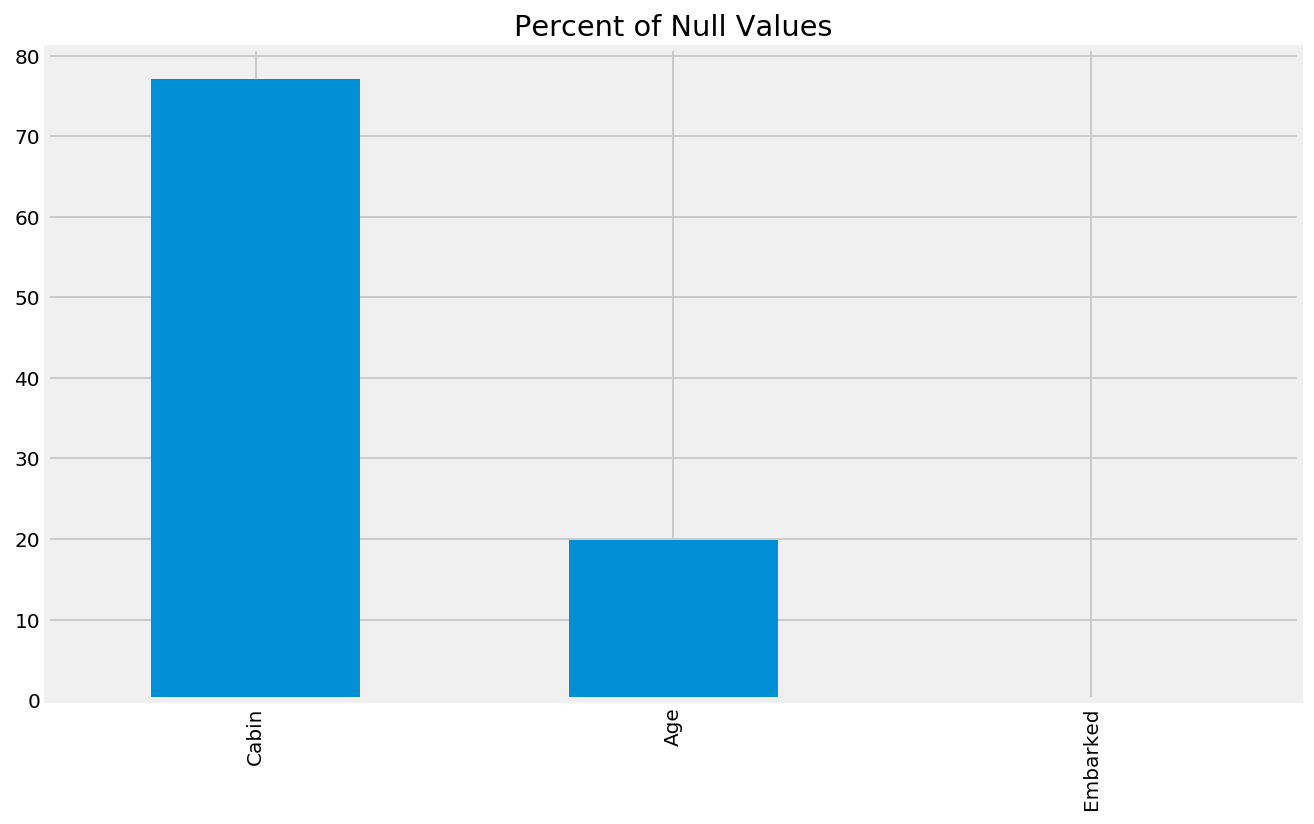

In [4]:
(train.isnull().sum()[train.isnull().sum() > 0] / train.shape[0] * 100.).round(3).sort_values(ascending=False).to_frame('null_percent)').plot(kind='bar', figsize=(10,6), title='Percent of Null Values', legend=False);

In [5]:
train.groupby(['Cabin']).sum().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584,0,1,36.0,0,0,40.1250
A14,476,0,1,0.0,0,0,52.0000
A16,557,1,1,48.0,1,0,39.6000
A19,285,0,1,0.0,0,0,26.0000
A20,600,1,1,49.0,1,0,56.9292


In [6]:
train.groupby(['Embarked']).sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,4005.92,65,61,10072.2962
Q,32178,30,224,786.50,33,13,1022.2543
S,289496,217,1514,16312.75,368,266,17439.3988


In [7]:
imputed_numerical = train[['Age']].select_dtypes(include=['number']).as_matrix()
Age_MICE=MICE().complete(imputed_numerical)

[MICE] Completing matrix with shape (891, 1)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.002
[MICE] Starting imputation round 3/110, elapsed time 0.003
[MICE] Starting imputation round 4/110, elapsed time 0.003
[MICE] Starting imputation round 5/110, elapsed time 0.004
[MICE] Starting imputation round 6/110, elapsed time 0.004
[MICE] Starting imputation round 7/110, elapsed time 0.005
[MICE] Starting imputation round 8/110, elapsed time 0.005
[MICE] Starting imputation round 9/110, elapsed time 0.006
[MICE] Starting imputation round 10/110, elapsed time 0.006
[MICE] Starting imputation round 11/110, elapsed time 0.007
[MICE] Starting imputation round 12/110, elapsed time 0.008
[MICE] Starting imputation round 13/110, elapsed time 0.008
[MICE] Starting imputation round 14/110, elapsed time 0.009
[MICE] Starting imputation round 15/110, elapsed time 0.010
[MICE] Starting imputation round 16/110, elapsed time 0.011
[MIC

In [8]:
Age_KNN=KNN(k=3).complete(imputed_numerical)

Imputing row 1/891 with 0 missing, elapsed time: 0.077
Imputing row 101/891 with 0 missing, elapsed time: 0.078
Imputing row 201/891 with 0 missing, elapsed time: 0.078
Imputing row 301/891 with 1 missing, elapsed time: 0.079
Imputing row 401/891 with 0 missing, elapsed time: 0.079
Imputing row 501/891 with 0 missing, elapsed time: 0.080
Imputing row 601/891 with 0 missing, elapsed time: 0.080
Imputing row 701/891 with 0 missing, elapsed time: 0.080
Imputing row 801/891 with 0 missing, elapsed time: 0.081
[KNN] Warning: 177/891 still missing after imputation, replacing with 0


In [9]:
Age_SoftImpute=SoftImpute().complete(imputed_numerical)

[SoftImpute] Max Singular Value of X_init = 883.307124
[SoftImpute] Iter 1: observed MAE=0.593982 rank=1
[SoftImpute] Iter 2: observed MAE=0.593982 rank=1
[SoftImpute] Iter 3: observed MAE=0.593982 rank=1
[SoftImpute] Iter 4: observed MAE=0.593982 rank=1
[SoftImpute] Iter 5: observed MAE=0.593982 rank=1
[SoftImpute] Iter 6: observed MAE=0.593982 rank=1
[SoftImpute] Iter 7: observed MAE=0.593982 rank=1
[SoftImpute] Iter 8: observed MAE=0.593982 rank=1
[SoftImpute] Iter 9: observed MAE=0.593982 rank=1
[SoftImpute] Iter 10: observed MAE=0.593982 rank=1
[SoftImpute] Iter 11: observed MAE=0.593982 rank=1
[SoftImpute] Iter 12: observed MAE=0.593982 rank=1
[SoftImpute] Iter 13: observed MAE=0.593982 rank=1
[SoftImpute] Iter 14: observed MAE=0.593982 rank=1
[SoftImpute] Iter 15: observed MAE=0.593982 rank=1
[SoftImpute] Iter 16: observed MAE=0.593982 rank=1
[SoftImpute] Iter 17: observed MAE=0.593982 rank=1
[SoftImpute] Iter 18: observed MAE=0.593982 rank=1
[SoftImpute] Iter 19: observed MAE=0

In [10]:
compare_imputed = pd.DataFrame(list(zip(train.Age, Age_MICE.round(0), Age_KNN, Age_SoftImpute)))
compare_imputed = compare_imputed.rename(columns={0:'Not_Imputed',
                               1: 'MICE',
                               2: 'KNN',
                               3: 'SoftImpute'})

In [11]:
compare_imputed

,Not_Imputed,MICE,KNN,SoftImpute
0,22.0,[22.0],[22.0],[22.0]
1,38.0,[38.0],[38.0],[38.0]
2,26.0,[26.0],[26.0],[26.0]
3,35.0,[35.0],[35.0],[35.0]
4,35.0,[35.0],[35.0],[35.0]
5,NaN,[26.0],[0.0],[0.0]
6,54.0,[54.0],[54.0],[54.0]
7,2.0,[2.0],[2.0],[2.0]
8,27.0,[27.0],[27.0],[27.0]
9,14.0,[14.0],[14.0],[14.0]


In [12]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
Age_MICE.mean()

29.71826962150942

In [14]:
train[['Age']] = Age_MICE.round(0)

In [15]:
train[['Age']]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,26.0
6,54.0
7,2.0
8,27.0
9,14.0


In [16]:
# 4. Clean Data

train_obj = train.select_dtypes(exclude=[np.number])
train_num = train.select_dtypes(include=[np.number])

# Drop the 2 rows were values are missing from Embarked

train.dropna(axis=0, subset=['Embarked'], inplace=True)

# Fill NaN Ages with the mean

# train['Age'] = train['Age'].fillna(train.Age.mean())

# Fill NaN Cabin with 'Unidentified'

train.Cabin.fillna('Unidentified', inplace=True)

In [17]:
# 5. Feature Engineering

# Slicing on First Letter of Cabin, then dropping categorical column

train['Cabin_category'] = train['Cabin'].map(lambda x: x[:1])

train = train.drop('Cabin', axis=1)

# Creating dummy columns for the different cabins, then dropping categorical column

train = pd.concat([train, pd.get_dummies(train['Cabin_category'])], axis = 1)

train.drop(['Cabin_category'], axis=1, inplace=True)

# Creating dummy column for Reverends on board

train['IsReverend'] = train['Name'].map(lambda x: 1 if 'Rev' in x else 0)

# Creating dummy column for Young Males on board

train['IsMaster'] = train['Name'].map(lambda x: 1 if 'Master' in x else 0)

# Dropping Name and Ticket columns

train.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Creating Male/Female dummy columns, then dropping categorical column

train = pd.concat([train, pd.get_dummies(train['Sex'])], axis = 1)

train.drop(['Sex'], axis=1, inplace=True)

# Label Encode Pclass for modeling purposes

encode = LabelEncoder()
train['Pclass'] = encode.fit_transform(train['Pclass'])

# Label Encode Embarked for modeling purposes

encode = LabelEncoder()
train['Embarked'] = encode.fit_transform(train['Embarked'])

# Creating column that sums up Siblings and Parents

train['FamilyCount'] = train['SibSp'] + train['Parch']

# Creating column that counts whether passenger had family on board

train['HasFamily'] = train['FamilyCount'].map(lambda x: 1 if x > 0 else 0)

# Creating dummy column for Employees on board

train['IsEmployee'] = train['Fare'].map(lambda x: 1 if x==0 else 0)

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U', 'IsReverend',
       'IsMaster', 'female', 'male', 'FamilyCount', 'HasFamily', 'IsEmployee'],
      dtype='object')

In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
A              0
B              0
C              0
D              0
E              0
F              0
G              0
T              0
U              0
IsReverend     0
IsMaster       0
female         0
male           0
FamilyCount    0
HasFamily      0
IsEmployee     0
dtype: int64

In [20]:
train.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U', 'IsReverend',
       'IsMaster', 'female', 'male', 'FamilyCount', 'HasFamily', 'IsEmployee'],
      dtype='object')

In [21]:
# # Feature Selection

# from sklearn.feature_selection import  SelectKBest, f_regression, f_classif
# selector = SelectKBest(score_func=f_classif)

# target = ['Survived']
# not_target = train.drop(['Survived'], axis=1)

# predictors = not_target

# selector.fit(train[predictors], train[target].values.ravel())

# best_features = selector.get_support(indices=True)

# features = list(train[predictors].columns[selector.get_support(indices = True)])
# features

In [22]:
# Train-Train-Split on Data Set

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

target = ['Survived']
not_target = train.drop(['Survived'], axis=1)

X = not_target
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [23]:
# Standard Scaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:616: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/base.py:459: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [24]:
# GridSearchCV across LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

logreg_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)

logreg_gridsearch = logreg_gridsearch.fit(X_train, y_train)

best_logreg_gridsearch = logreg_gridsearch.best_estimator_

logreg_gridsearch_train = best_logreg_gridsearch.score(X_train, y_train)
logreg_gridsearch_test = best_logreg_gridsearch.score(X_test, y_test)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

In [25]:
# GridSearchCV across SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

gs_params = {
    'loss':['hinge', 'log', 'modified_huber',
    'squared_hinge', 'perceptron'],
    'penalty':['none', 'l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0' : [1]
}

SGD_gridsearch = GridSearchCV(SGDClassifier(), gs_params, cv=5, verbose=1)

SGD_gridsearch = SGD_gridsearch.fit(X_train, y_train)

best_SGD_gridsearch = SGD_gridsearch.best_estimator_

SGD_gridsearch_train = best_SGD_gridsearch.score(X_train, y_train)
SGD_gridsearch_test = best_SGD_gridsearch.score(X_test, y_test)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

In [26]:
# GridSearchCV across kNN Classification

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors':[1,3,5,9,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_gridsearch = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1, n_jobs=2)

knn_gridsearch = knn_gridsearch.fit(X_train, y_train)

best_knn_gridsearch = knn_gridsearch.best_estimator_

knn_gridsearch_train = best_knn_gridsearch.score(X_train, y_train)
knn_gridsearch_test = best_knn_gridsearch.score(X_test, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

In [27]:
# RandomizedSearchCV across kNN Classification

from sklearn.model_selection import RandomizedSearchCV

knn_params = {
    'n_neighbors':[1,3,5,9,15,21],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_randomsearch = RandomizedSearchCV(KNeighborsClassifier(), knn_params, cv=5, 
                                      n_iter=10, verbose=1, n_jobs=2, random_state=42)

knn_randomsearch = knn_randomsearch.fit(X_train, y_train)

best_knn_randomsearch = knn_randomsearch.best_estimator_

knn_randomsearch_train = best_knn_randomsearch.score(X_train, y_train)
knn_randomsearch_test = best_knn_randomsearch.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/

In [28]:
# GridSearchCV across BernoulliNB

from sklearn.naive_bayes import BernoulliNB

gs_params = {
    'alpha': np.logspace(-5,0,100)
}

bernoulliNB_gridsearch = GridSearchCV(BernoulliNB(), gs_params, cv=5, verbose=1)

bernoulliNB_gridsearch = bernoulliNB_gridsearch.fit(X_train, y_train)

best_bernoulliNB_gridsearch = bernoulliNB_gridsearch.best_estimator_

bernoulliNB_gridsearch_train = best_bernoulliNB_gridsearch.score(X_train, y_train)
bernoulliNB_gridsearch_test = best_bernoulliNB_gridsearch.score(X_test, y_test)


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array w

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:749: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.

In [29]:
# RandomForestClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline

gs_params = {'n_estimators' : [10, 15, 20],
          'max_depth' : [None, 2, 3, 4, 5],
          'n_jobs' : [-1]}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=gs_params, cv=5, scoring='accuracy')
rf_gs.fit(X_train, y_train)

best_rf_gs = rf_gs.best_estimator_

rf_gs_train = best_rf_gs.score(X_train, y_train)
rf_gs_test = best_rf_gs.score(X_test, y_test)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:499: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_va

In [30]:
# XGBoost Classifier

from xgboost import XGBClassifier

gs_params = {
    'max_depth':[1, 2, 3, 4, 5],
    'n_estimators':range(1, 10, 1),
    'learning_rate':np.logspace(-5,0,5),
    'silent' : [False],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'n_jobs' : [-1]
}

xgb_gs = GridSearchCV(XGBClassifier(), gs_params, cv=3, verbose=1)

xgb_gs = xgb_gs.fit(X_train, y_train)

best_xgb_gs = xgb_gs.best_estimator_

xgb_gs_train = best_xgb_gs.score(X_train, y_train)
xgb_gs_test = best_xgb_gs.score(X_test, y_test)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 2025 out of 2025 | elapsed:   10.7s finished
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing

In [31]:
# Model Selection Executive Summary

print('GridSearchCV across LogisticRegression:')
print(f"Best Parameters = {logreg_gridsearch.best_params_}")
print(f"Best CV Score = {logreg_gridsearch.best_score_}")
print(f"Train Score = {logreg_gridsearch_train}")
print(f"Test Score = {logreg_gridsearch_test}")
print()

print('GridSearchCV across SGDClassifier:')
print(f"Best Parameters = {SGD_gridsearch.best_params_}")
print(f"Best CV Score = {SGD_gridsearch.best_score_}")
print(f"Train Score = {SGD_gridsearch_train}")
print(f"Test Score = {SGD_gridsearch_test}")
print()

print('GridSearchCV across kNN Classification:')
print(f"Best Parameters = {knn_gridsearch.best_params_}")
print(f"Best CV Score = {knn_gridsearch.best_score_}")
print(f"Train Score = {knn_gridsearch_train}")
print(f"Test Score = {knn_gridsearch_test}")
print()

print('GridSearchCV across BernoulliNB:')
print(f"Best Parameters = {bernoulliNB_gridsearch.best_params_}")
print(f"Best CV Score = {bernoulliNB_gridsearch.best_score_}")
print(f"Train Score = {bernoulliNB_gridsearch_train}")
print(f"Test Score = {bernoulliNB_gridsearch_test}")
print()

print('GridSearchCV across Random Forest:')
print(f"Best Parameters = {rf_gs.best_params_}")
print(f"Best CV Score = {rf_gs.best_score_}")
print(f"Train Score = {rf_gs_train}")
print(f"Test Score = {rf_gs_test}")
print()

print('GridSearchCV across XGBoost:')
print(f"Best Parameters = {xgb_gs.best_params_}")
print(f"Best CV Score = {xgb_gs.best_score_}")
print(f"Train Score = {xgb_gs_train}")
print(f"Test Score = {xgb_gs_test}")
print()

GridSearchCV across LogisticRegression:
Best Parameters = {'C': 0.15556761439304723, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score = 0.8303303303303303
Train Score = 0.8408408408408409
Test Score = 0.8116591928251121

GridSearchCV across SGDClassifier:
Best Parameters = {'eta0': 1, 'learning_rate': 'invscaling', 'loss': 'log', 'penalty': 'none'}
Best CV Score = 0.8258258258258259
Train Score = 0.8318318318318318
Test Score = 0.8071748878923767

GridSearchCV across kNN Classification:
Best Parameters = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best CV Score = 0.8378378378378378
Train Score = 0.8603603603603603
Test Score = 0.7982062780269058

GridSearchCV across BernoulliNB:
Best Parameters = {'alpha': 1.0}
Best CV Score = 0.7702702702702703
Train Score = 0.7747747747747747
Test Score = 0.7802690582959642

GridSearchCV across Random Forest:
Best Parameters = {'max_depth': None, 'n_estimators': 20, 'n_jobs': -1}
Best CV Score = 0.8333333333333334
Train Score

In [32]:
test = pd.read_csv('./test.csv')

In [33]:
imputed_numerical = test[['Age']].select_dtypes(include=['number']).as_matrix()
Age_MICE=MICE().complete(imputed_numerical)

[MICE] Completing matrix with shape (418, 1)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.001
[MICE] Starting imputation round 3/110, elapsed time 0.001
[MICE] Starting imputation round 4/110, elapsed time 0.002
[MICE] Starting imputation round 5/110, elapsed time 0.002
[MICE] Starting imputation round 6/110, elapsed time 0.003
[MICE] Starting imputation round 7/110, elapsed time 0.003
[MICE] Starting imputation round 8/110, elapsed time 0.004
[MICE] Starting imputation round 9/110, elapsed time 0.004
[MICE] Starting imputation round 10/110, elapsed time 0.004
[MICE] Starting imputation round 11/110, elapsed time 0.005
[MICE] Starting imputation round 12/110, elapsed time 0.005
[MICE] Starting imputation round 13/110, elapsed time 0.006
[MICE] Starting imputation round 14/110, elapsed time 0.006
[MICE] Starting imputation round 15/110, elapsed time 0.006
[MICE] Starting imputation round 16/110, elapsed time 0.007
[MIC

In [34]:
test[['Age']] = Age_MICE

In [35]:
# 4. Clean Test Data

test_obj = test.select_dtypes(exclude=[np.number])
test_num = test.select_dtypes(include=[np.number])

# Drop the 2 rows were values are missing from Embarked

test.dropna(axis=0, subset=['Embarked'], inplace=True)

# Fill NaN Ages with the mean

# test['Age'] = test['Age'].fillna(test.Age.mean())

# Fill NaN Cabin with 'Unidentified'

test.Cabin.fillna('Unidentified', inplace=True)

# Fill NaN Fare with the mean

test['Fare'] = test['Fare'].fillna(test.Fare.mean())

In [36]:
# 5. Feature Engineering

# Slicing on First Letter of Cabin, then dropping categorical column

test['Cabin_category'] = test['Cabin'].map(lambda x: x[:1])

test = test.drop('Cabin', axis=1)

# Creating dummy column for Reverends on board

test['IsReverend'] = test['Name'].map(lambda x: 1 if 'Rev' in x else 0)

# Creating dummy column for Young Males on board

test['IsMaster'] = test['Name'].map(lambda x: 1 if 'Master' in x else 0)

# Dropping Name and Ticket columns

test.drop(['Name', 'Ticket'], axis=1, inplace=True)

# Creating Male/Female dummy columns, then dropping categorical column

test = pd.concat([test, pd.get_dummies(test['Sex'])], axis = 1)

test.drop(['Sex'], axis=1, inplace=True)

# Label Encoding Passenger Class

encode = LabelEncoder()
test['Pclass'] = encode.fit_transform(test['Pclass'])

# Label Encoding Embarked Column

encode = LabelEncoder()
test['Embarked'] = encode.fit_transform(test['Embarked'])

# Creating column that sums up Siblings and Parents

test['FamilyCount'] = test['SibSp'] + test['Parch']

# Creating column that counts whether passenger had family on board

test['HasFamily'] = test['FamilyCount'].map(lambda x: 1 if x > 0 else 0)

# Creating dummy column for Employees on board

test['IsEmployee'] = test['Fare'].map(lambda x: 1 if x==0 else 0)

test["T"] = 0

# Creating dummy columns for the different cabins, then dropping categorical column

test = pd.concat([test, pd.get_dummies(test['Cabin_category'])], axis = 1)

test.drop(['Cabin_category'], axis=1, inplace=True)

In [38]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,IsReverend,IsMaster,female,...,IsEmployee,T,A,B,C,D,E,F,G,U
0,892,2,34.5,0,0,7.8292,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,893,2,47.0,1,0,7.0000,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,894,1,62.0,0,0,9.6875,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,895,2,27.0,0,0,8.6625,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,2,22.0,1,1,12.2875,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
not_target.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,A,B,C,...,G,T,U,IsReverend,IsMaster,female,male,FamilyCount,HasFamily,IsEmployee
0,1,2,22.0,1,0,7.2500,2,0,0,0,...,0,0,1,0,0,0,1,1,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,3,2,26.0,0,0,7.9250,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,4,0,35.0,1,0,53.1000,2,0,0,1,...,0,0,0,0,0,1,0,1,1,0
4,5,2,35.0,0,0,8.0500,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [42]:
test = test[not_target.columns]

In [44]:
not_target.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U', 'IsReverend', 'IsMaster',
       'female', 'male', 'FamilyCount', 'HasFamily', 'IsEmployee'],
      dtype='object')

In [45]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U', 'IsReverend', 'IsMaster',
       'female', 'male', 'FamilyCount', 'HasFamily', 'IsEmployee'],
      dtype='object')

In [46]:
# Use Chosen Model to Make Predictions

y_preds = best_xgb_gs.predict(test.values)


In [47]:
# Submission XGBoost

submission_best_xgb_gs = pd.DataFrame(data = y_preds, columns = ['Survived'], index=test['PassengerId'])
submission_best_xgb_gs.to_csv('./submission_best_xgb_gs.csv')

In [48]:
# Submission Random Forest

submission_best_rf_gs = pd.DataFrame(data = y_preds, columns = ['Survived'], index=test['PassengerId'])
submission_best_rf_gs.to_csv('./submission_best_rf_gs.csv')